# Market Basket Analysis with Apriori

Author: Nirta Ika Yunita & Samuel Natamihardja
<br>Date: November 18, 2019

The dataset consists of 21293 observations from a bakery.
<br>The data file contains four variables (Date, Time, Transaction ID and Item).
<br>Transaction ID ranges from 1 through 9684.
<br>However, there are some skipped numbers in Transaction IDs.
<br>Also, there are duplicated entries, as shown in observation #2 and #3.
<br>Besides, the Item contains "Adjustment", "NONE", and "Afternoon with the baker".
<br>While the entries of "Adjustment" and "NONE" are straight forward, "Afternoon with the baker" may be a real purchase.

## Import Library

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preparation

In [2]:
data = pd.read_csv('BreadBasket_DMS.csv')
data.columns = map(str.lower, data.columns)
data['item'] = data['item'].str.lower()

In [3]:
data.head()

,date,time,transaction,item
0,2016-10-30,09:58:11,1,bread
1,2016-10-30,10:05:34,2,scandinavian
2,2016-10-30,10:05:34,2,scandinavian
3,2016-10-30,10:07:57,3,hot chocolate
4,2016-10-30,10:07:57,3,jam


In [4]:
# as stated before, there are 'none' value in 'item' attribute
# we should drop it
data = data[data.item != 'none']

In [5]:
data.shape

(20507, 4)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20507 entries, 0 to 21292
Data columns (total 4 columns):
date           20507 non-null object
time           20507 non-null object
transaction    20507 non-null int64
item           20507 non-null object
dtypes: int64(1), object(3)
memory usage: 801.1+ KB


In [7]:
data.describe(include='all')

,date,time,transaction,item
count,20507,20507,20507.000000,20507
unique,159,8197,NaN,94
top,2017-02-04,12:07:39,NaN,coffee
freq,292,16,NaN,5471
mean,NaN,NaN,4976.202370,NaN
std,NaN,NaN,2796.203001,NaN
min,NaN,NaN,1.000000,NaN
25%,NaN,NaN,2552.000000,NaN
50%,NaN,NaN,5137.000000,NaN
75%,NaN,NaN,7357.000000,NaN


## Data Exploration

In [8]:
print('List of Items sold at the Bakery:')
print('\nTotal Items: ', len(data.item.unique()))
print('-' * 16)
for i in data.item.unique():
    print(i)

List of Items sold at the Bakery:

Total Items:  94
----------------
bread
scandinavian
hot chocolate
jam
cookies
muffin
coffee
pastry
medialuna
tea
tartine
basket
mineral water
farm house
fudge
juice
ella's kitchen pouches
victorian sponge
frittata
hearty & seasonal
soup
pick and mix bowls
smoothies
cake
mighty protein
chicken sand
coke
my-5 fruit shoot
focaccia
sandwich
alfajores
eggs
brownie
dulce de leche
honey
the bart
granola
fairy doors
empanadas
keeping it local
art tray
bowl nic pitt
bread pudding
adjustment
truffles
chimichurri oil
bacon
spread
kids biscuit
siblings
caramel bites
jammie dodgers
tiffin
olum & polenta
polenta
the nomad
hack the stack
bakewell
lemon and coconut
toast
scone
crepes
vegan mincepie
bare popcorn
muesli
crisps
pintxos
gingerbread syrup
panatone
brioche and salami
afternoon with the baker
salad
chicken stew
spanish brunch
raspberry shortbread sandwich
extra salami or feta
duck egg
baguette
valentine's card
tshirt
vegan feast
postcard
nomad bag
chocolat

In [9]:
# top 20 best selling items
top20 = data.item.value_counts().head(20)
top20

coffee           5471
bread            3325
tea              1435
cake             1025
pastry            856
sandwich          771
medialuna         616
hot chocolate     590
cookies           540
brownie           379
farm house        374
muffin            370
alfajores         369
juice             369
soup              342
scone             327
toast             318
scandinavian      277
truffles          193
coke              185
Name: item, dtype: int64

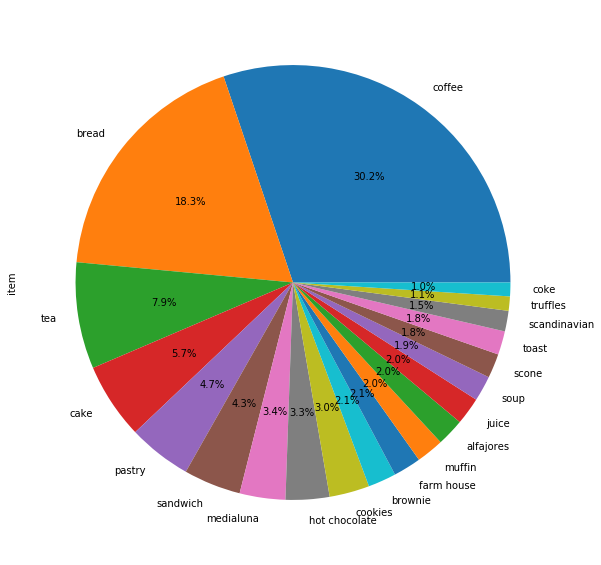

In [10]:
# pie chart
plt.figure(1, figsize = (10, 10))
top20.plot.pie(autopct = '%1.1f%%')
plt.show()

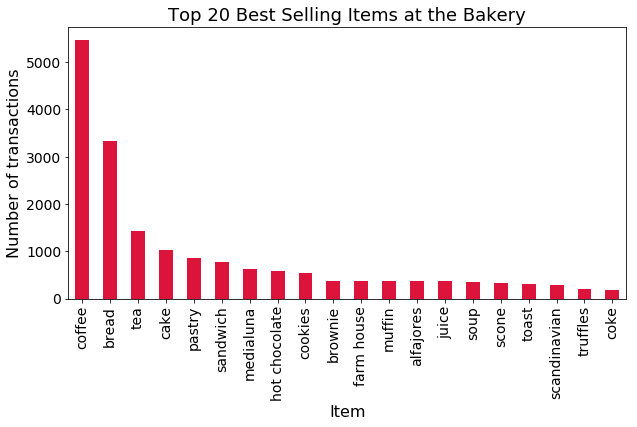

In [11]:
# bar chart
fig, ax = plt.subplots(figsize = (10, 5))
top20.plot.bar(color = 'crimson', linewidth = 1)
plt.xlabel('Item', fontsize = 16)
plt.ylabel('Number of transactions', fontsize = 16)
ax.tick_params(labelsize = 14)
plt.title('Top 20 Best Selling Items at the Bakery', fontsize = 18)
plt.show()

In [12]:
# make a copy of data for feature engineering 
data1 = data.copy()

# feature engineering for 'datetime' column
data1['datetime'] = pd.to_datetime(data1['date'] + " " + data1['time'])
data1['month'] = data1['datetime'].dt.month
data1['day_name'] = data1['datetime'].dt.weekday_name
data1['hour'] = data1['datetime'].dt.hour

# pick necessary columns only
data1 = data1[['transaction', 'item', 'month', 'day_name', 'hour']]

data1.head()

,transaction,item,month,day_name,hour
0,1,bread,10,Sunday,9
1,2,scandinavian,10,Sunday,10
2,2,scandinavian,10,Sunday,10
3,3,hot chocolate,10,Sunday,10
4,3,jam,10,Sunday,10


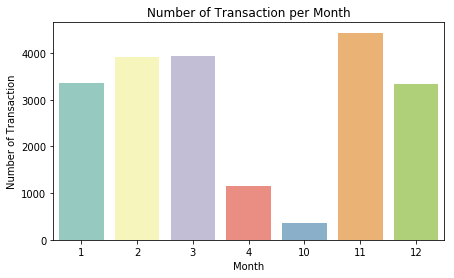

In [13]:
fig, ax = plt.subplots(figsize = (7, 4))
sns.countplot(x = 'month', data = data1, palette = 'Set3')
plt.xlabel('Month')
plt.ylabel('Number of Transaction')
plt.title('Number of Transaction per Month')
plt.show()

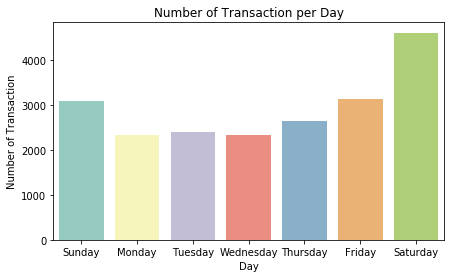

In [14]:
fig, ax = plt.subplots(figsize = (7, 4))
sns.countplot(x = 'day_name', data = data1, palette = 'Set3')
plt.xlabel('Day')
plt.ylabel('Number of Transaction')
plt.title('Number of Transaction per Day')
plt.show()

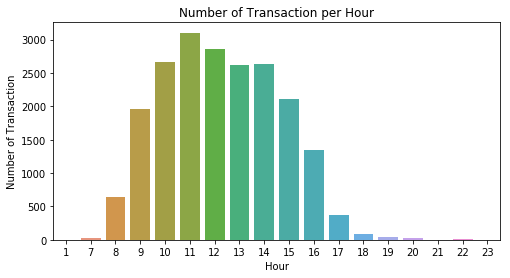

In [15]:
fig, ax = plt.subplots(figsize = (8, 4))
sns.countplot(x = 'hour', data = data1)
plt.xlabel('Hour')
plt.ylabel('Number of Transaction')
plt.title('Number of Transaction per Hour')
plt.show()

## Apriori Algorithm

<font size = '4'>**Theory of Apriori Algorithm**</font>

There are four major components of Apriori algorithm:

Support
<br>Confidence
<br>Lift
<br>Conviction

Below is the explanation.

1. Support
<br>Support refers to the default popularity of an item and can be calculated by finding number of transactions containing a particular item divided by total number of transactions.
<br>Suppose we want to find support for item B. This can be calculated as:
<br><br><font size = '3'><span style = 'background-color: #ffcccc'><strong>Support(B) = (Transactions containing (B)) / (Total Transactions)</strong></span></font>


2. Confidence
<br>Confidence refers to the likelihood that an item B is also bought if item A is bought.
<br>It can be calculated by finding the number of transactions where A and B are bought together, divided by total number of transactions where A is bought.
<br>Mathematically, it can be represented as:
<br><br><font size = '3'><span style = 'background-color: #ffcccc'><strong>Confidence(A → B) = (Transactions containing both (A and B)) / (Transactions containing A)</strong></span></font>


3. Lift
<br>Lift(A -> B) refers to the increase in the ratio of sale of B when A is sold.
<br>Lift(A –> B) can be calculated by dividing Confidence(A -> B) divided by Support(B).
<br>Mathematically it can be represented as:
<br><br><font size = '3'><span style = 'background-color: #ffcccc'><strong>Lift(A→B) = (Confidence (A→B)) / (Support (B))</strong></span></font>
<br><br>lift = 1 → There is no association between A and B.
<br>lift < 1→ A and B are unlikely to be bought together.
<br>lift > 1 → greater the lift greater is the likelihood of buying both products together.


4. Conviction
<br>Conviction(A -> B) is the ratio of the expected frequency that A occurs without B.
<br>Conviction(A -> B) can be calculated by dividing (1 - Support(B)) by (1 - Confidence(A -> B)).
<br>Mathematically it can be represented as:
<br><br><font size = '3'><span style = 'background-color: #ffcccc'><strong>Conviction(A -> B) = (1 - Support(B)) / (1 - Confidence(A -> B))</strong></span></font>


<br>source:
<br>https://medium.com/@deepak.r.poojari/apriori-algorithm-in-python-recommendation-engine-5ba89bd1a6da
<br>https://en.wikipedia.org/wiki/Association_rule_learning#Useful_Concepts

In [16]:
ap_data = data.copy()
ap_data.head()

,date,time,transaction,item
0,2016-10-30,09:58:11,1,bread
1,2016-10-30,10:05:34,2,scandinavian
2,2016-10-30,10:05:34,2,scandinavian
3,2016-10-30,10:07:57,3,hot chocolate
4,2016-10-30,10:07:57,3,jam


In [17]:
# import packages
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import apriori

In [18]:
# hot encode the data
hot_encode = ap_data.groupby(['transaction', 'item'])['item'].count().unstack().reset_index().fillna(0).set_index('transaction')

# define rule
# if the item is not bought (count < 1), assign zero (0)
# if the item is bought (count >= 1), assign one (1)
def encode_units(x):
    if x < 1:
        return 0
    if x >= 1:
        return 1
hot_encode = hot_encode.applymap(encode_units)

hot_encode.head()

item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,bowl nic pitt,bread,bread pudding,brioche and salami,brownie,cake,caramel bites,cherry me dried fruit,chicken sand,chicken stew,chimichurri oil,chocolates,christmas common,coffee,coffee granules,coke,cookies,crepes,crisps,drinking chocolate spoons,duck egg,dulce de leche,eggs,ella's kitchen pouches,empanadas,extra salami or feta,fairy doors,farm house,focaccia,frittata,fudge,gift voucher,gingerbread syrup,granola,hack the stack,half slice monster,hearty & seasonal,honey,hot chocolate,jam,jammie dodgers,juice,keeping it local,kids biscuit,lemon and coconut,medialuna,mighty protein,mineral water,mortimer,muesli,muffin,my-5 fruit shoot,nomad bag,olum & polenta,panatone,pastry,pick and mix bowls,pintxos,polenta,postcard,raspberry shortbread sandwich,raw bars,salad,sandwich,scandinavian,scone,siblings,smoothies,soup,spanish brunch,spread,tacos/fajita,tartine,tea,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
transaction,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Support

In [19]:
# set support threshold with min value of 5%
freq_item = apriori(hot_encode, min_support = 0.05, use_colnames = True)
freq_item = freq_item.sort_values(by = 'support', ascending = False).reset_index(drop = True)
print('Items with min 5% support are:')
freq_item

Items with min 5% support are:


,support,itemsets
0,0.478394,(coffee)
1,0.327205,(bread)
2,0.142631,(tea)
3,0.103856,(cake)
4,0.090016,"(coffee, bread)"
5,0.086107,(pastry)
6,0.071844,(sandwich)
7,0.061807,(medialuna)
8,0.058320,(hot chocolate)
9,0.054728,"(coffee, cake)"


- For single item, the result shows that **coffee** is the most item (beverage) bought and **bread** is the most food bought.
- For double item, **bread & coffee** get the higher support result, then **cake & coffee**.

### Data Association

In [20]:
# set lift threshold with min value of 5%
data_asso = association_rules(freq_item, metric='lift', min_threshold = 0.5)
data_asso = data_asso.sort_values(by = 'lift', ascending = False).reset_index(drop = True)
print('Most sold pair of items are:')
data_asso

Most sold pair of items are:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
1,(coffee),(cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905
2,(coffee),(bread),0.478394,0.327205,0.090016,0.188163,0.575059,-0.066517,0.828731
3,(bread),(coffee),0.327205,0.478394,0.090016,0.275105,0.575059,-0.066517,0.719561


Below is the example to interpret the result above:
<br>For the first row (antecedent = cake and consequent = coffee)
<br>Customer who buy cake more likely to buy coffee with confidence level 52%.
<br>The lift is 1.1, the customer likely to buy cake and coffee together.

## Recommendation

This bakery can make set menus for their customers to rise the sales. Below is the recommendation:
1. Cake and coffee
2. Coffee and bread